<a href="https://colab.research.google.com/github/hilya09/phishing-detection/blob/main/Train_model(7)_7Fitur(Top6%26path_len)_Kombinasi_Dataset2%2B200_URL_baru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Download dataset

In [ ]:
# Download the file
!wget https://raw.githubusercontent.com/hilya09/dataset/main/urldataset_new.csv

--2024-05-11 03:04:12--  https://raw.githubusercontent.com/hilya09/dataset/main/urldataset_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10404694 (9.9M) [text/plain]
Saving to: ‘urldataset_new.csv’

urldataset_new.csv  100%[===================>]   9.92M  --.-KB/s    in 0.1s    

2024-05-11 03:04:13 (73.3 MB/s) - ‘urldataset_new.csv’ saved [10404694/10404694]



In [ ]:
data = pd.read_csv("urldataset_new.csv")

In [ ]:
dataset_meet= pd.read_csv('datasetmeetgood.csv')

In [ ]:
dataset_meet.duplicated().sum()

0

In [ ]:
dataset_meet

,URL,Label
0,https://meet.google.com/kkz-tseg-fxq,0
1,https://meet.google.com/wpk-wims-cii,0
2,https://meet.google.com/tub-xirz-pcs,0
3,https://meet.google.com/zwm-tnze-nth,0
4,https://meet.google.com/hce-oayw-ife,0
...,...,...
95,https://meet.google.com/upv-bvjx-toq,0
96,https://meet.google.com/tqb-niqj-dio,0
97,https://meet.google.com/xfe-ohsc-adv,0
98,https://meet.google.com/wry-tvye-brh,0


In [ ]:
dataset_pish =pd.read_csv('datasetlongpish.csv')

In [ ]:
dataset_pish.duplicated().sum()

0

In [ ]:
dataset_pish

,URL,Label
0,https://docs.google.com/presentation/d/e/2PACX...,1
1,https://docs.google.com/presentation/d/e/2PACX...,1
2,https://jabproperty.co.jp/Mobile/Conf/.wt.lt/h...,1
3,https://gjigjja.r.bh.d.sendibt3.com/tr/cl/40Ti...,1
4,http://snackwyze.com/blog_backup/wp-content/pl...,1
5,https://hadicah.r.bh.d.sendibt3.com/tr/cl/z32m...,1
6,https://hajchcc.r.bh.d.sendibt3.com/tr/cl/JpMz...,1
7,https://security-adminsx.sexidude.com/pc.html#...,1
8,https://gjjbjbd.r.bh.d.sendibt3.com/tr/cl/vrZN...,1
9,https://hajhafj.r.bh.d.sendibt3.com/tr/cl/oL33...,1


In [ ]:
dataset_good =pd.read_csv('datasetlonggood.csv')

In [ ]:
dataset_good.duplicated().sum()

0

In [ ]:
dataset_good

,URL,Label
0,https://www.msn.com/id-id/olahraga/other/timna...,0
1,https://www.msn.com/id-id/olahraga/sepak_bola/...,0
2,https://nasional.kompas.com/read/2024/05/09/13...,0
3,https://www.kompas.com/global/read/2024/05/08/...,0
4,https://www.kompas.com/global/read/2024/05/08/...,0
5,https://edition.cnn.com/2024/05/09/americas/me...,0
6,https://edition.cnn.com/2024/05/08/middleeast/...,0
7,https://edition.cnn.com/travel/india-half-hour...,0
8,https://sport.detik.com/sepakbola/liga-indones...,0
9,https://www.detik.com/sumbagsel/berita/d-73293...,0


In [ ]:
# Mengecek URL terpendek pada kolom 'URL'
shortest_url_length = dataset_good['URL'].apply(len).min()

# Tampilkan URL terpendek
shortest_url = dataset_good.loc[dataset_good['URL'].apply(len) == shortest_url_length, 'URL'].iloc[0]

print("URL terpendek:", shortest_url)
print("Panjang URL:", shortest_url_length)

URL terpendek: https://www.sciencedirect.com/science/article/pii/S0014579309010850
Panjang URL: 67


In [ ]:
# Gabungkan semuanya
combined_all = pd.concat([dataset_meet, dataset_good, dataset_pish])

In [ ]:
combined_all

,URL,Label
0,https://meet.google.com/kkz-tseg-fxq,0
1,https://meet.google.com/wpk-wims-cii,0
2,https://meet.google.com/tub-xirz-pcs,0
3,https://meet.google.com/zwm-tnze-nth,0
4,https://meet.google.com/hce-oayw-ife,0
...,...,...
45,https://email.mail1.onesignal.os.tc/c/eJwUz7Fu...,1
46,https://email.m.teachable.com/c/eJw0zzFuxCAQRu...,1
47,https://www.gvomail.com/redir.php?mail.pial=27...,1
48,https://apac01.safelinks.protection.outlook.co...,1


In [ ]:
#Storing the data in CSV file
combined_all[['URL', 'Label']].to_csv('dataset-tambahan-200.csv', index=False)

In [ ]:
combined_all = pd.read_csv('dataset-tambahan-200.csv')

In [ ]:
# Gabungkan dataset_new dan 200 dataseturl baru
dataset_comb = pd.concat([data,combined_all])

In [ ]:
dataset_comb

,URL,Label
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0
3,https://resicorphome.com/brian/srr/austin/,0
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0
...,...,...
195,https://email.mail1.onesignal.os.tc/c/eJwUz7Fu...,1
196,https://email.m.teachable.com/c/eJw0zzFuxCAQRu...,1
197,https://www.gvomail.com/redir.php?mail.pial=27...,1
198,https://apac01.safelinks.protection.outlook.co...,1


# Exploratory Data Analysis (EDA)

In [ ]:
data

,URL,Label
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0
3,https://resicorphome.com/brian/srr/austin/,0
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0
...,...,...
259643,https://www.lovetheedit.com/postnewo/www.dropb...,1
259644,http://www.vg247.com/2017/04/24/best-nintendo-...,0
259645,https://lt.mydplr.com/16672ac75448ecdb528e1c66...,1
259646,http://www.heinzreber.net/homeflash1.html,1


In [ ]:
data['Label'].unique()

array([0, 1])

In [ ]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Good\t\t:', data[data.Label == 0].shape[0], 'data url')
print('-- [1] Phishing\t\t:', data[data.Label == 1].shape[0], 'data url\n')

Total Jumlah url: 259648 data

terdiri dari (label):
-- [0] Good		: 106372 data url
-- [1] Phishing		: 153276 data url



In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

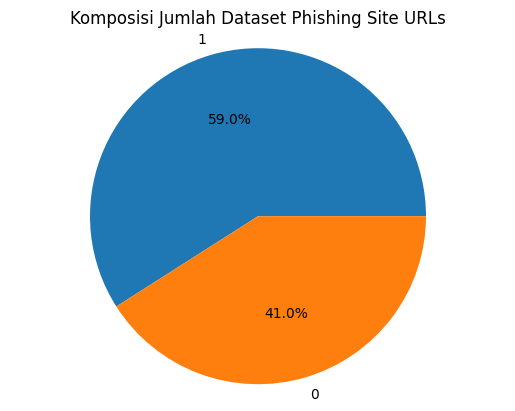

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

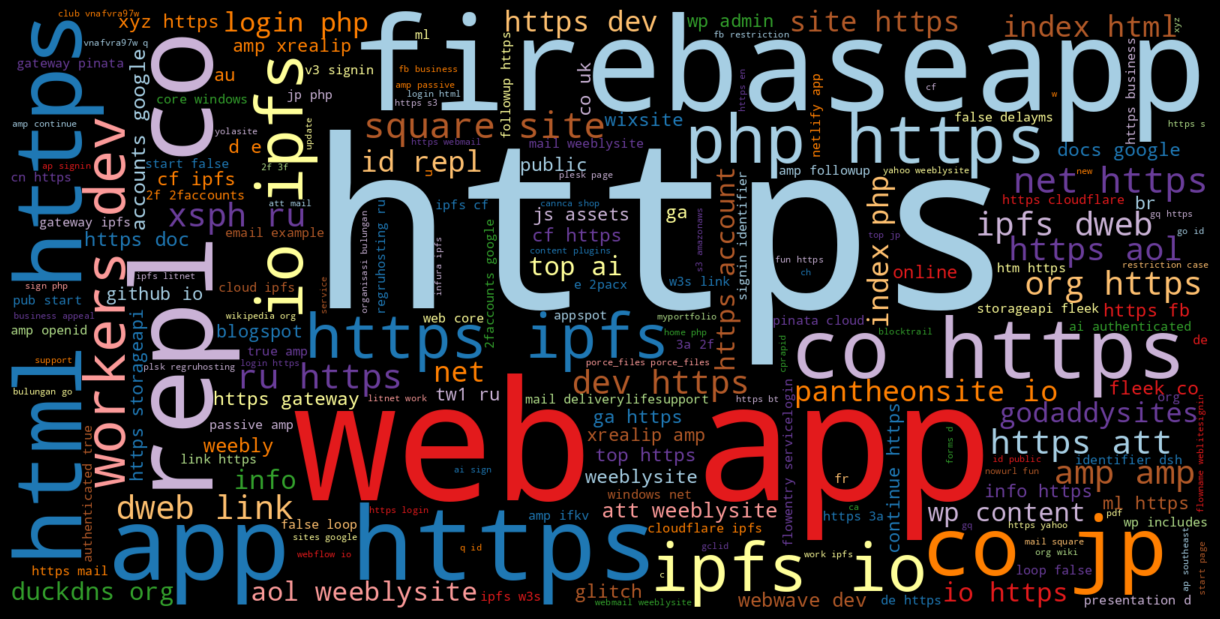

In [ ]:
data_good = data[data.Label== 0]
data_phish = data[data.Label== 1]

# Plotting WordCloud to identify the most frequent words in good url
phish_url = " ".join(i for i in data_good.URL)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

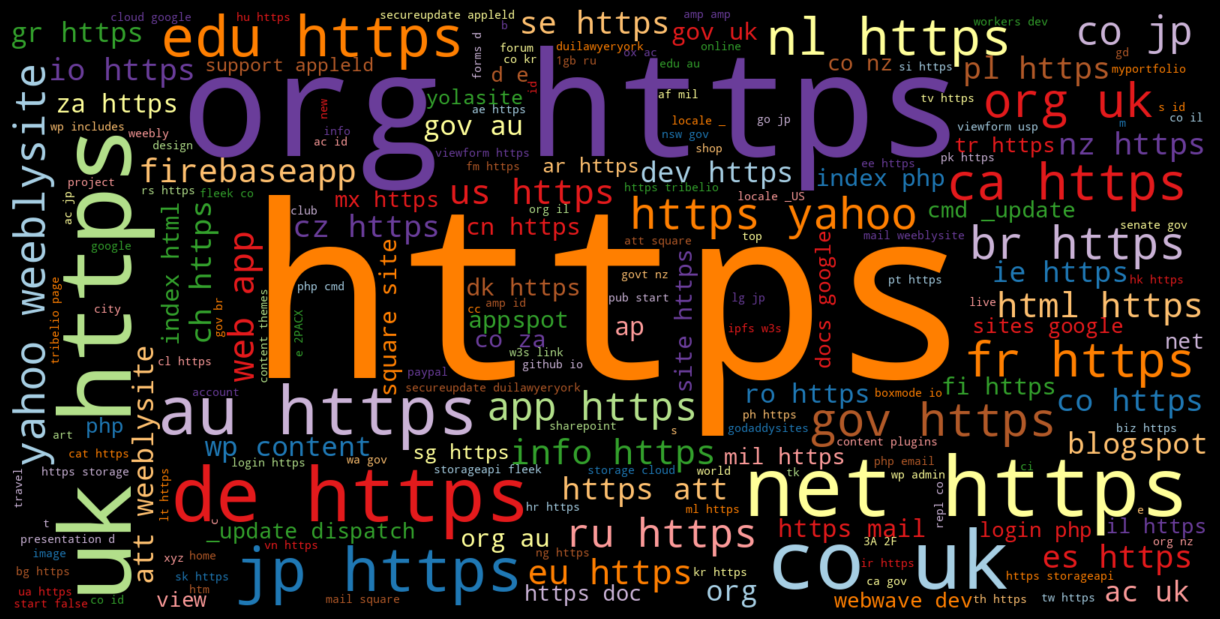

In [ ]:
# Plotting WordCloud to identify the most frequent words in phishing url
phish_url = " ".join(i for i in data_phish.URL)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Feature Engineering

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse
import re

In [ ]:
# https in scheme
def httpsURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "https":
    return 0  # Legitimate
  else:
    return 1  # Phishing

dataset_comb['https_scheme'] = dataset_comb['URL'].apply(lambda i: httpsURL(i))

# url = 'https://colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=yPUvNqOJDRXl'
# result = detect_https_protocol(url)
# print(result)

In [ ]:
# http in scheme
def httpURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "http":
    return 1 # Phishing
  else:
    return 0  # Legitimate

dataset_comb['http_scheme'] = dataset_comb['URL'].apply(lambda i: httpURL(i))

# url = 'http://colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=yPUvNqOJDRXl'
# result = detect_http_protocol(url)
# print(result)

In [ ]:
# Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

url= 'https://www.colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=ZmhhaXruVUNV'
domain = getDomain(url)
netloc_parts = domain.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhi
subdomain_length = len(domain)
print(netloc_parts)
print(domain)
print(subdomain)
print(subdomain_length)

['colab', 'research', 'google', 'com']
colab.research.google.com
colab.research
25


In [ ]:
# Fungsi untuk menghitung panjang domain dalam URL
def domain_length(url):
    domain = getDomain(url)
    if len(domain) < 20:
        return 0
    else:
        return 1
dataset_comb['domain_length'] = dataset_comb['URL'].apply(lambda i: domain_length(i))

In [ ]:
# Fungsi untuk menghitung jumlah karakter non alfabet dalam domain URL
def non_alphabet_domain_length(url):
    domain = getDomain(url)
    non_alphabet_count = sum(not c.isalpha() for c in domain)
    if non_alphabet_count < 3:
        return 0
    else:
        return 1
dataset_comb['len_non_alphabet_domain'] = dataset_comb['URL'].apply(lambda i: non_alphabet_domain_length(i))
# url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
# result = nonalphabet_domain_count(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa jumlah ? dalam domain URL
def count_question_mark_domain(url):
    domain = getDomain(url)
    count_question_mark_count = domain.count('?')
    return 0 if count_question_mark_count == 0 else 1
dataset_comb['count_question_mark_domain'] = dataset_comb['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah & dalam domain URL
def count_ampersand_domain(url):
    domain = getDomain(url)
    count_ampersand_count = domain.count('&')
    return 0 if count_ampersand_count == 0 else 1
dataset_comb['count_ampersand_domain'] = dataset_comb['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah * dalam domain URL
def count_asterisk_domain(url):
    domain = getDomain(url)
    count_asterisk_count = domain.count('*')
    return 0 if count_asterisk_count == 0 else 1
dataset_comb['count_asterisk_domain'] = dataset_comb['URL'].apply(lambda i: httpURL(i))

In [ ]:
def getSubdomain(url):
  domain = getDomain(url)
  netloc_parts = domain.split('.')  # Memecah domain menjadi bagian-bagian
  if len(netloc_parts) <= 2:  # Jika URL tidak memiliki subdomain
    return 0
  else:
    subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian subdomain
    return subdomain

In [ ]:
# Fungsi untuk menghitung panjang subdomain dalam URL
def len_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      subdomain_length = len(subdomain)
      return 0 if subdomain_length < 15 else 1
dataset_comb['len_subdomain'] = dataset_comb['URL'].apply(lambda i: len_subdomain(i))

# Contoh penggunaan
# result = len_subdomain(url)
# print(result)  # Output: 0

In [ ]:
# Fungsi untuk memeriksa jumlah karakter non alfabet dalam subdomain URL
def non_alphabet_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      non_alphabet_count = sum(not c.isalpha() for c in subdomain)
      return 0 if non_alphabet_count < 2 else 1
dataset_comb['len_non_alphabet_subdomain'] = dataset_comb['URL'].apply(lambda i: non_alphabet_subdomain_length(i))
# url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
# result = len_non_alphabet_subdomain(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa jumlah special karakter dalam subdomain URL
def spec_character_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      spec_character_count = sum(not c.isalnum() for c in subdomain)
      return 0 if spec_character_count == 0 else 1
dataset_comb['len_special_char_subdomain'] = dataset_comb['URL'].apply(lambda i: spec_character_subdomain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah . dalam subdomain URL
def count_dot_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('.')
      if count == 0:
        return 0
      else:
        return 1
dataset_comb['count_dot_subdomain'] = dataset_comb['URL'].apply(lambda i: count_dot_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah - dalam subdomain URL
def count_dash_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('-')
      if count < 2:
        return 0
      else:
        return 1
dataset_comb['count_dash_subdomain'] = dataset_comb['URL'].apply(lambda i: count_dash_subdomain(i))

In [ ]:
# Fungsi untuk menghitung rasio panjang URL terhadap panjang path
def calculate_url_path_ratio(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    if len(path) == 0:
        return 0
    else:
        ratio = len(url) / len(path)
        if ratio < 3:
            return 0
        else:
            return 1
dataset_comb['ratio_url_path'] = dataset_comb['URL'].apply(lambda i: calculate_url_path_ratio(i))
url = 'https://meet.google.com/pgi-fcmy-xde'
result = calculate_url_path_ratio(url)
print(result)

0


In [ ]:
def count_subdomains(url):
  domain = getDomain(url)
  dot_count = domain.count('.')
    # Determine feature value based on the number of dots
  if dot_count > 3:
    return 1  # Phishing
  elif dot_count == 3:
    return 0.5  # Suspicious
  else:
    return 0  # Legitimate
dataset_comb['count_subdomain'] = dataset_comb['URL'].apply(lambda i: count_subdomains(i))

In [ ]:
# Cek panjang hostname pada url
def hostname_length(url):
    return len(urlparse(url).netloc)
dataset_comb['hostname_length'] = dataset_comb['URL'].apply(lambda i: hostname_length(i))

In [ ]:
# Fungsi untuk menghitung panjang path
def length_path(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    return len(path)
dataset_comb['path_len'] = dataset_comb['URL'].apply(lambda i: length_path(i))

In [ ]:
dataset_comb

,URL,Label,https_scheme,http_scheme,domain_length,len_non_alphabet_domain,count_question_mark_domain,count_ampersand_domain,count_asterisk_domain,len_subdomain,len_non_alphabet_subdomain,len_special_char_subdomain,count_dot_subdomain,count_dash_subdomain,ratio_url_path,count_subdomain,hostname_length,path_len
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,37
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,33
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,17
3,https://resicorphome.com/brian/srr/austin/,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,16,18
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,19,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://email.mail1.onesignal.os.tc/c/eJwUz7Fu...,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1.0,27,351
196,https://email.m.teachable.com/c/eJw0zzFuxCAQRu...,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0.5,21,274
197,https://www.gvomail.com/redir.php?mail.pial=27...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,15,10
198,https://apac01.safelinks.protection.outlook.co...,1,0,0,1,1,0,0,0,1,1,1,1,0,1,1.0,39,1


In [ ]:
dataset_comb.columns

Index(['URL', 'Label', 'https_scheme', 'http_scheme', 'domain_length',
       'len_non_alphabet_domain', 'count_question_mark_domain',
       'count_ampersand_domain', 'count_asterisk_domain', 'len_subdomain',
       'len_non_alphabet_subdomain', 'len_special_char_subdomain',
       'count_dot_subdomain', 'count_dash_subdomain', 'ratio_url_path',
       'count_subdomain', 'hostname_length', 'path_len'],
      dtype='object')

In [ ]:
#Storing the data in CSV file
dataset_comb[['URL', 'Label', 'https_scheme', 'http_scheme', 'domain_length',
       'len_non_alphabet_domain', 'count_question_mark_domain',
       'count_ampersand_domain', 'count_asterisk_domain', 'len_subdomain',
       'len_non_alphabet_subdomain', 'len_special_char_subdomain',
       'count_dot_subdomain', 'count_dash_subdomain', 'ratio_url_path',
       'count_subdomain', 'hostname_length', 'path_len']].to_csv('urldataset-baru+200-16-features.csv', index=False)

# Menentukan Feature dan Terget

In [ ]:
# 15 Predictor Variables
X = dataset_comb[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length',
          'count_dot_subdomain',
          'count_subdomain'
        ]]
#Target Variable
y = dataset_comb['Label']

In [ ]:
# 6 Predictor Variables
X = dataset_comb[['https_scheme', 'http_scheme', 'count_question_mark_domain','count_ampersand_domain','count_asterisk_domain', 'ratio_url_path'
        ]]

#Target Variable
y = dataset_comb['Label']

In [ ]:
# 6 Predictor + url len Variables
X = dataset_comb[['https_scheme', 'http_scheme', 'count_question_mark_domain','count_ampersand_domain','count_asterisk_domain', 'ratio_url_path','path_len'
        ]]

#Target Variable
y = dataset_comb['Label']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259648 entries, 0 to 259647
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         259648 non-null  object 
 1   Label                       259648 non-null  int64  
 2   https_scheme                259648 non-null  int64  
 3   http_scheme                 259648 non-null  int64  
 4   domain_length               259648 non-null  int64  
 5   len_non_alphabet_domain     259648 non-null  int64  
 6   count_question_mark_domain  259648 non-null  int64  
 7   count_ampersand_domain      259648 non-null  int64  
 8   count_asterisk_domain       259648 non-null  int64  
 9   len_subdomain               259648 non-null  int64  
 10  len_non_alphabet_subdomain  259648 non-null  int64  
 11  len_special_char_subdomain  259648 non-null  int64  
 12  count_dot_subdomain         259648 non-null  int64  
 13  count_dash_sub

In [ ]:
discrete_features = X.dtypes == int

#Cek Korelasi
##Spearman Correlation

In [ ]:
# Predictor Variables
x = data.drop('URL', axis=1)

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['Label']
    temp = data.iloc[:, idx_s:idx_e]

    temp['Label'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

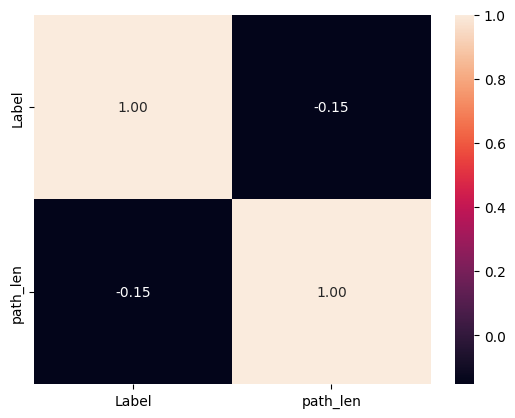

In [ ]:
corr_heatmap(x, 0, 10)

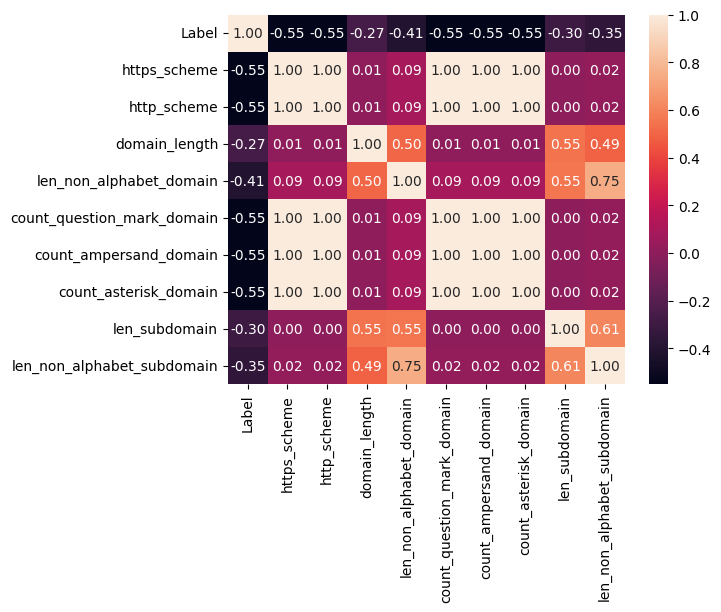

In [ ]:
corr_heatmap(x, 0, 10)

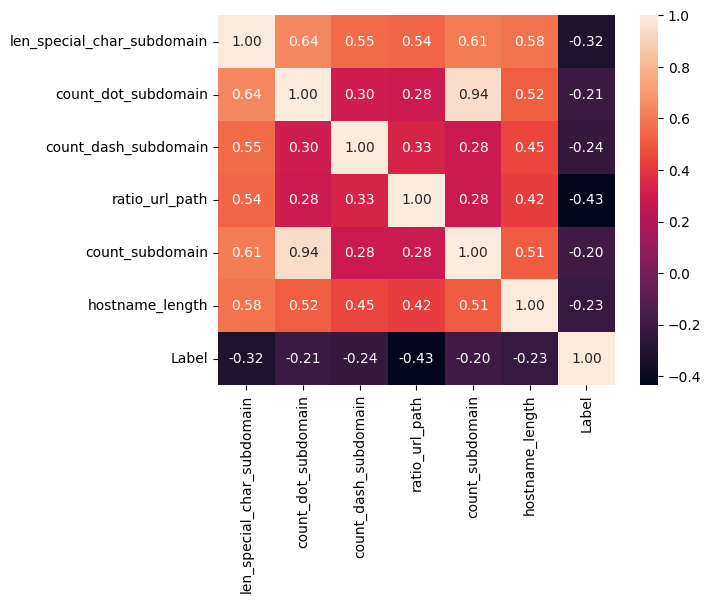

In [ ]:
corr_heatmap(x, 10, 16)

# Spliting Dataset - Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
X_train.shape

(207878, 7)

In [ ]:
X_test.shape

(51970, 7)

# Modelling

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

#Evaluasi

##Classification Report & Train Test Evaluation

###15 fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86     21305
     Class 1       0.91      0.90      0.90     30665

    accuracy                           0.89     51970
   macro avg       0.88      0.88      0.88     51970
weighted avg       0.89      0.89      0.89     51970



In [ ]:
score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

accuracy:   0.89


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)

In [ ]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.62 %
Akurasi Model (Test)  : 88.67 %


###6Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21305
     Class 1       0.90      0.90      0.90     30665

    accuracy                           0.88     51970
   macro avg       0.88      0.88      0.88     51970
weighted avg       0.88      0.88      0.88     51970



In [ ]:
score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)

In [ ]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.33 %
Akurasi Model (Test)  : 88.4 %


###7fitur(6fitur+url len)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.86      0.92      0.89     21305
     Class 1       0.94      0.89      0.92     30665

    accuracy                           0.90     51970
   macro avg       0.90      0.91      0.90     51970
weighted avg       0.91      0.90      0.90     51970



In [ ]:
score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

accuracy:   0.90


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)

In [ ]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 90.16 %
Akurasi Model (Test)  : 90.36 %


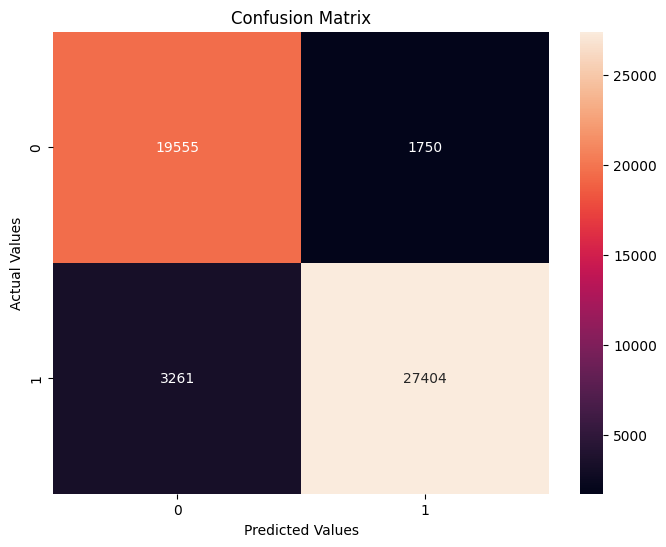

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

##K-Fold Cross Validation

###15 fitur


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.3f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 88.651%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###6 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.3f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.344%


###7 Fitur(6fitur+url len)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.3f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 90.205%


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definisikan jumlah fold dan metrik evaluasi
k = 15
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi model logreg di sini
logreg = LogisticRegression(max_iter=10000)

# Inisialisasi list untuk menyimpan hasil evaluasi
mean_scores = []

# Lakukan perulangan untuk n=1 hingga n=15
for n in range(2, 16):
    # Inisialisasi KFold dengan nilai n yang berbeda setiap iterasi
    kf = KFold(n_splits=n, shuffle=True, random_state=42)

    # Lakukan K-Fold Cross Validation
    scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

    # Hitung rata-rata dari skor akurasi
    mean_score = np.mean(scores)

    # Simpan hasil rata-rata dalam list
    mean_scores.append(mean_score)

# Tampilkan hasil evaluasi
for n, score in enumerate(mean_scores, start=1):
    print(f"KFold n={n}: Akurasi rata-rata: {scores.mean() * 100:.3f}%")

KFold n=1: Akurasi rata-rata: 88.712%
KFold n=2: Akurasi rata-rata: 88.712%
KFold n=3: Akurasi rata-rata: 88.712%
KFold n=4: Akurasi rata-rata: 88.712%
KFold n=5: Akurasi rata-rata: 88.712%
KFold n=6: Akurasi rata-rata: 88.712%
KFold n=7: Akurasi rata-rata: 88.712%
KFold n=8: Akurasi rata-rata: 88.712%
KFold n=9: Akurasi rata-rata: 88.712%
KFold n=10: Akurasi rata-rata: 88.712%
KFold n=11: Akurasi rata-rata: 88.712%
KFold n=12: Akurasi rata-rata: 88.712%
KFold n=13: Akurasi rata-rata: 88.712%
KFold n=14: Akurasi rata-rata: 88.712%


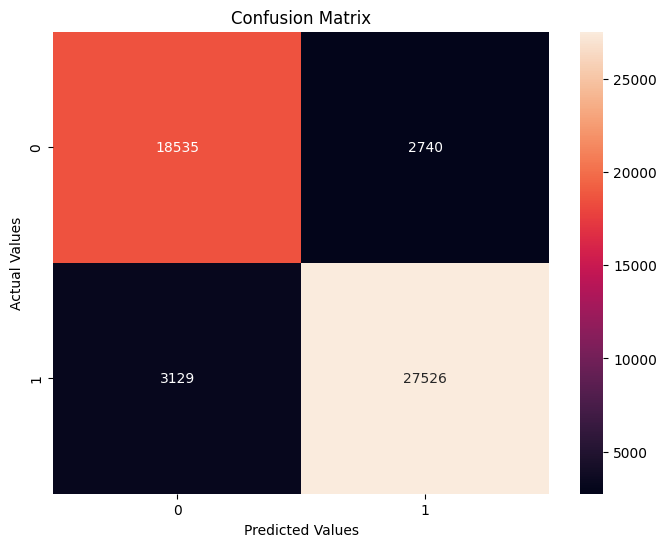

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Save Model Logistic Regression

In [ ]:
import joblib
joblib.dump((logreg), "model_phishing_lr.model")

['model_phishing_lr.model']

# Prediction

##15 fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(non_alphabet_domain_length(url))
    status.append(domain_length(url))


    status.append(len_subdomain(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(count_dot_subdomain(url))
    status.append(count_dash_subdomain(url))

    status.append(calculate_url_path_ratio(url))
    status.append(count_subdomains(url))
    status.append(hostname_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

##6Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))
    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

https://www.kompas.com/tren/read/2020/10/18/090000865/daftar-hoaks-tautan-link-sepanjang-2020-dari-kartu-prakerja-hingga-adidas?page=all

https://www.liputan6.com/cek-fakta/read/5084490/kumpulan-hoaks-catut-nama-kemensos-dari-website-palsu-hingga-link-pendaftaran-pkh

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

##7Fitur(6fitur+url len)

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))
    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(length_path(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
               'https://www.detik.com/edu/detikpedia/d-5728385/11-contoh-teks-artikel-serta-langkah-langkah-penulisannya',
               'https://shopee.co.id/CELANA-PANJANG-BAHAN-DASAR-BAHAN-KAIN-BAHAN-FORMAL-PRIA-i.1052386097.23756536881?publish_id=&sp_atk=b871503b-c1a4-4763-bfc3-bb2196ba4aa7&xptdk=b871503b-c1a4-4763-bfc3-bb2196ba4aa7'
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
************************
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

In [ ]:
def get_prediction_from_url(test_url, loaded_model):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = loaded_model.predict(features_test)
    if int(pred[0]) == 0:
        res = "GOOD"
    elif int(pred[0]) == 1:
        res = "PHISHING"
    return res

In [ ]:
# from joblib import load
# import datetime
# import pandas as pd

# loaded_model = load('/content/model_phishing_lr.model')

# predict_bad = []
# predict_good = []
# prediction_history= []

# while True:
#     url = input("Masukkan URL (atau tekan Enter untuk keluar): ")
#     if not url:
#         break

#     prediction = get_prediction_from_url(url, loaded_model)
#     print("Prediksi:", prediction)

#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     prediction_history.append((url, prediction, timestamp))

In [ ]:
# # Konversi riwayat prediksi menjadi DataFrame pandas
# df = pd.DataFrame(prediction_history, columns=['URL', 'Prediksi', 'Timestamp'])

# # Simpan DataFrame ke dalam file Excel
# df.to_excel('prediction_history.xlsx', index=False)

In [ ]:
from joblib import load
import datetime
import pandas as pd

def get_prediction_from_url(url, model):
    features_test = main(url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = model.predict(features_test)
    if int(pred[0]) == 0:
        return "GOOD"
    elif int(pred[0]) == 1:
        return "PHISHING"

loaded_model = load('model_phishing_lr.model')
prediction_history = []

while True:
    url = input("Masukkan URL (atau tekan Enter untuk keluar): ")
    if not url:
        break

    prediction = get_prediction_from_url(url, loaded_model)
    print("Prediksi:", prediction)

    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    prediction_history.append((url, prediction, timestamp))

# Konversi riwayat prediksi menjadi DataFrame pandas
df = pd.DataFrame(prediction_history, columns=['URL', 'Prediksi', 'Timestamp'])

# Simpan DataFrame ke dalam file Excel
df.to_excel('prediction_history.xlsx', index=False)